In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

C:\Users\nito8\AppData\Local\Temp\ipykernel_6404\3019270979.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed


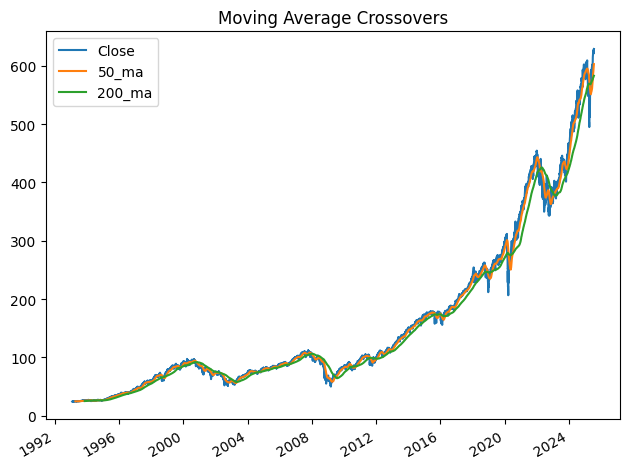

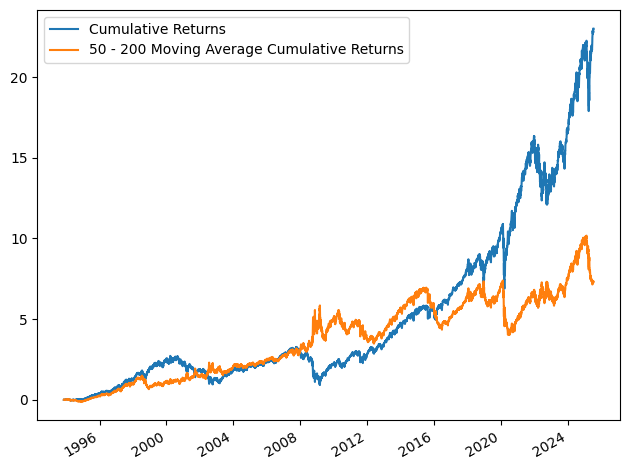

Price,Close,High,Low,Open,Volume,50_ma,200_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
1993-11-12,26.323570,26.411845,26.235295,26.252950,108200,26.114033,25.317936,1.0,0.004717,0.004717
1993-11-15,26.305904,26.376524,26.235285,26.376524,243300,26.119397,25.326696,1.0,0.004043,0.004043
1993-11-16,26.429504,26.447159,26.252955,26.358884,492600,26.130741,25.335814,1.0,0.008761,0.008761
1993-11-17,26.288261,26.447156,26.217642,26.447156,39600,26.141015,25.342926,1.0,0.003370,0.003370
1993-11-18,26.217644,26.305919,26.147024,26.252954,240800,26.148824,25.349164,1.0,0.000674,0.000674
...,...,...,...,...,...,...,...,...,...,...
2025-07-16,624.219971,624.729980,618.049988,623.739990,88987500,597.441222,581.699826,1.0,22.825210,7.272169
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,598.765042,582.005059,1.0,22.971012,7.322792
2025-07-18,627.580017,629.469971,626.460022,629.299988,65621600,600.173584,582.312104,1.0,22.953456,7.316696


In [2]:
TICKER = 'SPY'
FAST = 50
SLOW = 200
LOOKBACK = 10000

def get_data(ticker = TICKER, lookback = LOOKBACK):
    df = yf.download(ticker, period="max")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-lookback:, :]

def add_moving_averages(df, fast=FAST, slow=SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(slow).mean()

    plt.plot(df['Close'], label='Close')
    plt.plot(df[f'{fast}_ma'], label=f'{fast}_ma')
    plt.plot(df[f'{slow}_ma'], label=f'{slow}_ma')
    plt.legend()
    plt.title('Moving Average Crossovers')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def add_strategy(df, fast=FAST, slow=SLOW):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, fast=FAST, slow=SLOW):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_Returns'], label='Cumulative Returns')
    plt.plot(df['Strategy_Returns'], label=f'{fast} - {slow} Moving Average Cumulative Returns')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()